# Dataset Generation and Analysis


In [19]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from scipy import stats

from src.data_handler import MNISTAdditionDataset
from src.visualization import plot_sample_additions
from src.plot_settings import set_publication_style

# Set plot style for publication quality
set_publication_style()



We will go through a systematic process to construct a dataset for the MNIST addition task.

The main part of the dataset generation is in the `src/data_handler.py` file, and the visualization implementation is in the `src/visualization.py` file.

### Load MNIST data

Let's first load the MNIST data and check the distribution of the labels. We may have a guess that the distribution of the labels is uniform.

check the distribution of original data
and then the distribution of combined data (which is expected to be normal)

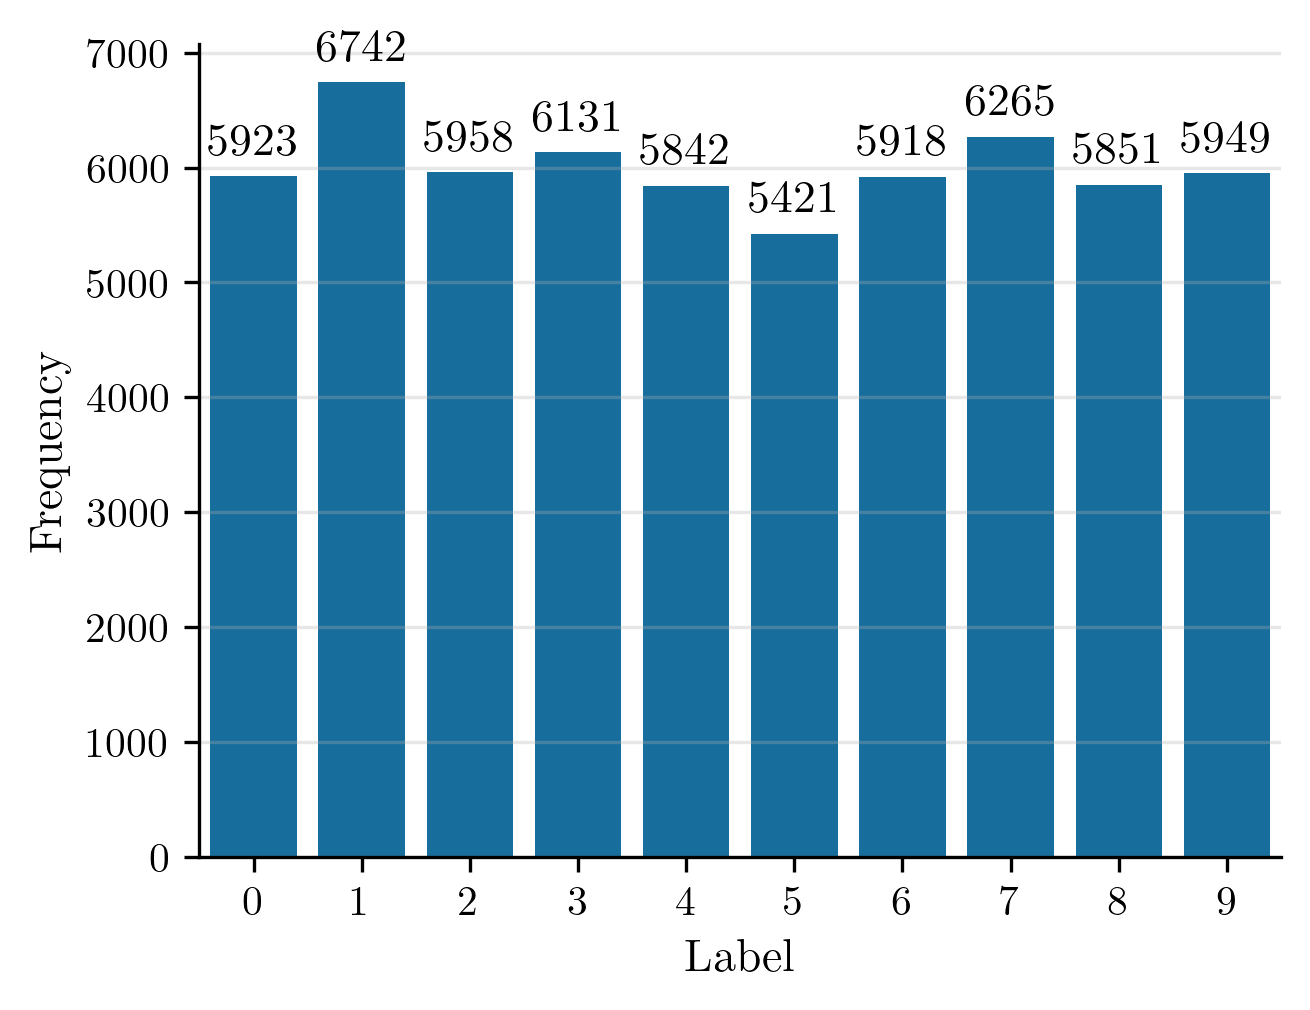

In [20]:
# Load MNIST data
(_, y_train), (_, y_test) = mnist.load_data()
labels = y_train

# Create figure with specific DPI for high quality
plt.figure(figsize=(4.5, 3.5), dpi=300)

# Create the distribution plot
ax = sns.countplot(data=pd.DataFrame({'digit': labels}), x='digit')

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d', padding=3)

# Customize the plot
plt.xlabel('Label')
plt.ylabel('Frequency')

# Tight layout to prevent label clipping
plt.tight_layout()
plt.savefig('../report/images/mnist_distribution.pdf', bbox_inches='tight', dpi=300)
plt.show()

The distribution of MNIST data is approximately uniform, with each digit appearing approximately 10% of the time.

Let's see the distribution of the combined data:

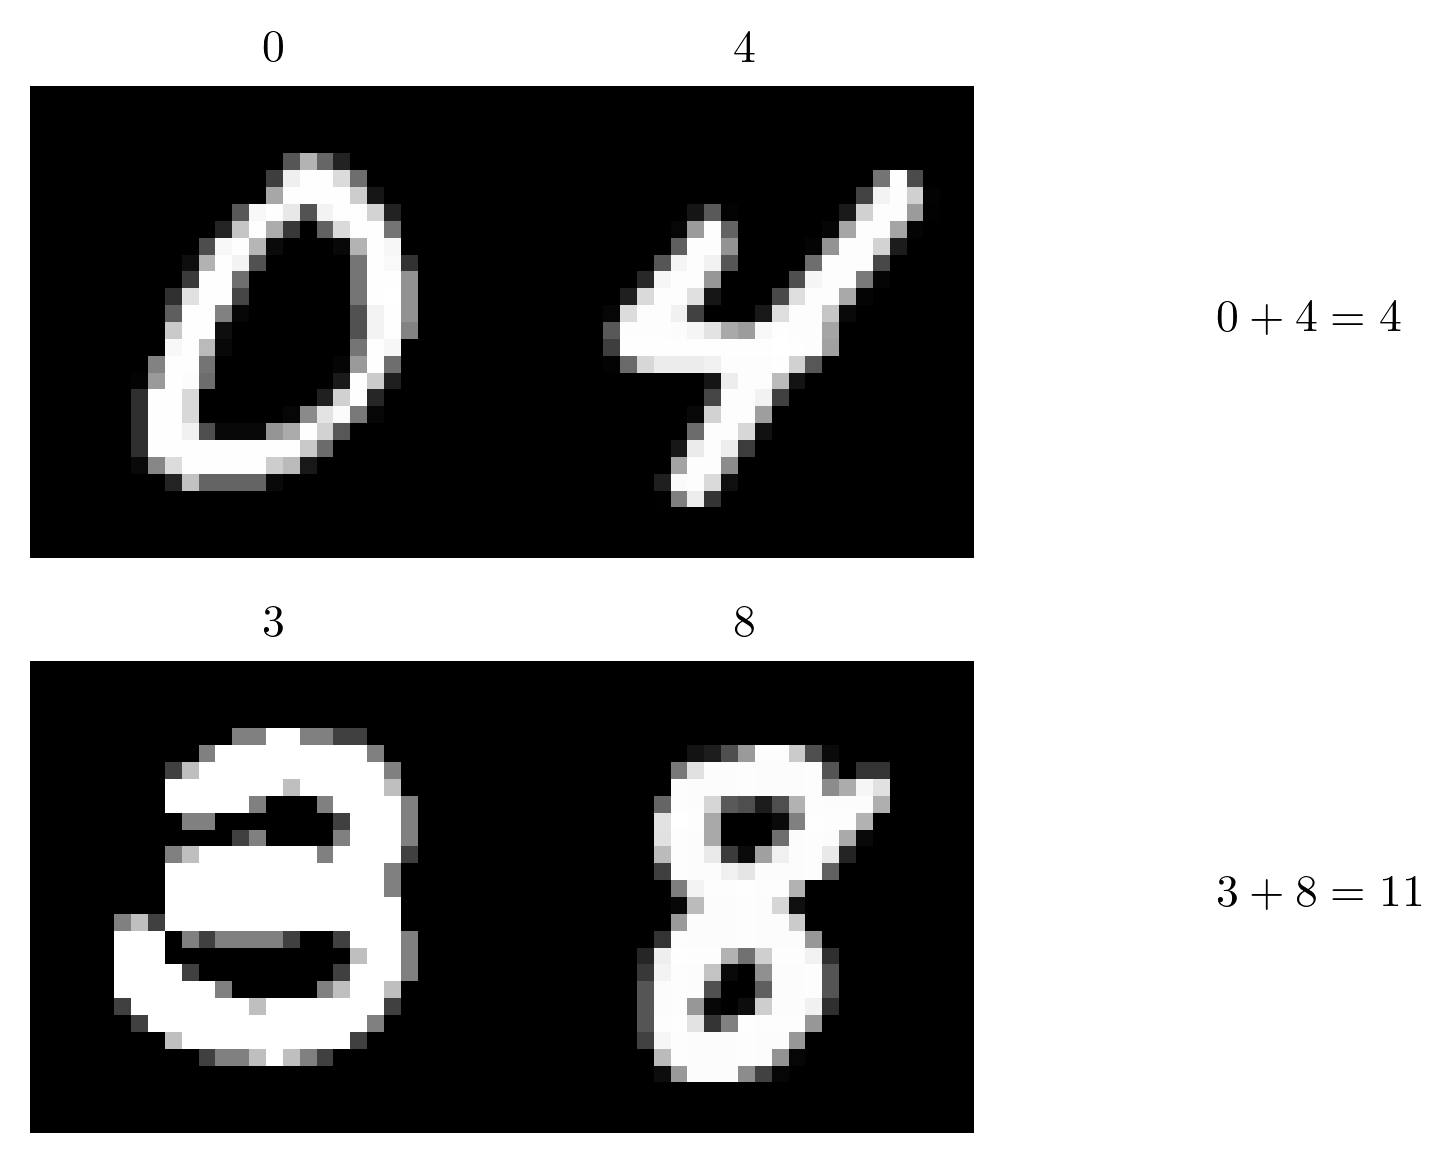

In [21]:
# Create dataset
dataset = MNISTAdditionDataset()
data = dataset.create_datasets()

# Display some examples
plot_sample_additions(data['train'][0], data['train'][1], data['train'][2], num_samples=2)
plt.savefig('../report/images/example_additions.pdf', bbox_inches='tight', dpi=300)
plt.show()

### Statistical Properties

Assuming that the MNIST digits are distributed uniformly, we can calculate the theoretical distribution of the sum of two digits.



<Figure size 3000x1800 with 0 Axes>

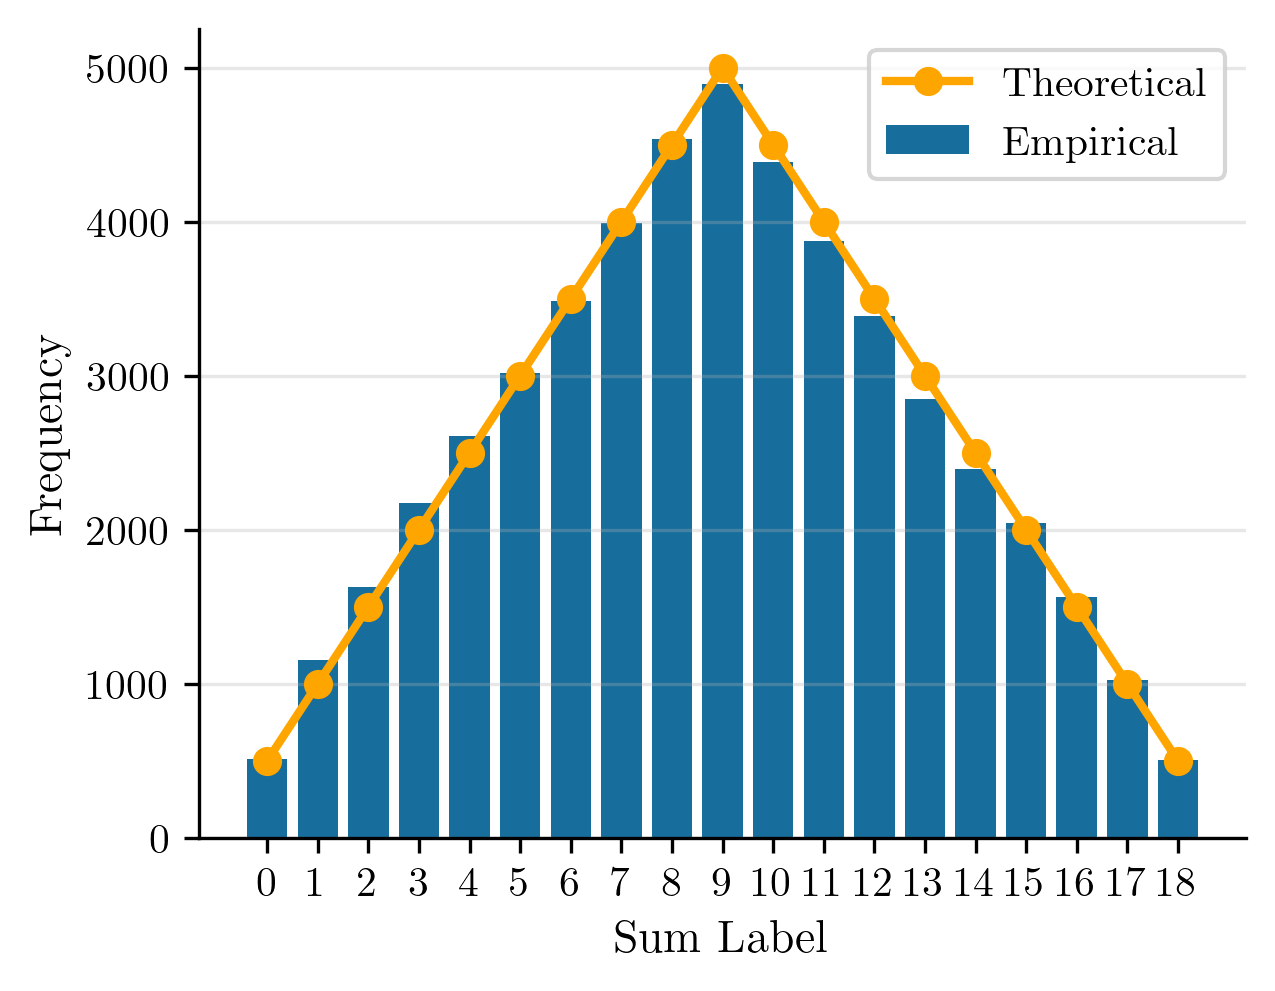

In [22]:
# Create figure
plt.figure(figsize=(10, 6))

# Plot empirical distribution
sum_labels = data['train'][1]

# Create a new plot with enhanced aesthetics
plt.figure(figsize=(4.5, 3.5), dpi=300)

# Plot empirical distribution
sns.countplot(data=pd.DataFrame({'sum': sum_labels}), x='sum', 
             label='Empirical')

# Calculate theoretical probabilities
sums = np.arange(19)
theoretical_probs = np.zeros(19)
for s in sums:
    if s <= 9:
        theoretical_probs[s] = (s + 1) / 100
    else:
        theoretical_probs[s] = (19 - s) / 100

# Scale theoretical probabilities to match empirical counts
scale_factor = len(sum_labels)
theoretical_counts = theoretical_probs * scale_factor

# Overlay theoretical distribution as a line plot
plt.plot(sums, theoretical_counts, 'o-', color='orange', linewidth=2, markersize=6, label='Theoretical')

# Customize the plot
plt.xlabel('Sum Label')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, 19))
plt.yticks()
plt.legend(loc='upper right', frameon=True)

# Save and display the plot
plt.savefig('../report/images/mnist_sum_distribution_combined.pdf', bbox_inches='tight', dpi=300)
plt.show()
